This is a simple demonesteration walking through the installation steps of the needed software packages on a virtual linux machine provided by [Google Colaboratory](https://colab.research.google.com/). These are more or less the same steps you need to follow in order to setup your environment on your machine.

The list of the stated prerequisites:
- Python 3.6+. If new to scientific computing in python, Anaconda is a recommended free python distribution from Continuum Analytics which provides a nice coherent platform with most of the tools needed.
- [Git](https://git-scm.com/downloads), for cloning the project repository.
- [Cmake](https://cmake.org/download/), for build-systems generation. The project requires cmake 3.10 or higher.
- A modern C++ compiler supporting C++17 standards. The project is tested with the GCC 10 compiler on a Linux machine and the Microsoft C++ build tools MSVC on a Windows-10 machine.
- The uraeus.smbd python package.

The linux machine provided by Colab already has compatible versions of **python**, **git** and **cmake**. We just need to:
1. Install a newer gcc compiler.
2. Clone and install the [uraeus.smbd](https://github.com/khaledghobashy/uraeus-smbd) and [uraeus.nmbd.cpp](https://github.com/khaledghobashy/uraeus_nmbd_cpp) packages.

*Note: Code celss in Jupyter notebooks can accept terminal commands by including an exclamation mark (**!**) before the command. This will be used to setup the virtual machine hosting this notebook.*

## Installing GCC 10
The code cell below has the terminal commands needed to install gcc 10 and set it as the default compiler for the machine. Select the cell and press **Shift + Enter** to run the cell. You will be invoked to press **Enter** to continue, to do so, select the box prompted by the terminal and press **Enter**.

In [3]:
!sudo apt install software-properties-common
!sudo add-apt-repository ppa:ubuntu-toolchain-r/test
!sudo apt install gcc-10 g++-10
!sudo update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-10 90 --slave /usr/bin/g++ g++ /usr/bin/g++-10 --slave /usr/bin/gcov gcov /usr/bin/gcov-10

Reading package lists... Done
Building dependency tree       
Reading state information... Done
software-properties-common is already the newest version (0.96.24.32.13).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
 Toolchain test builds; see https://wiki.ubuntu.com/ToolChain

 More info: https://launchpad.net/~ubuntu-toolchain-r/+archive/ubuntu/test
Press [ENTER] to continue or Ctrl-c to cancel adding it.

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRele

Checking the default version of gcc.

In [4]:
!gcc --version

gcc (Ubuntu 10.1.0-2ubuntu1~18.04) 10.1.0
Copyright (C) 2020 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



----

## Cloning uraeus packages
The code cell below has the terminal commands needed to clone the needed uraeus packages. Just run the cell.

In [1]:
!git clone https://github.com/khaledghobashy/uraeus_nmbd_cpp.git
!git clone https://github.com/khaledghobashy/uraeus-smbd.git

Cloning into 'uraeus_nmbd_cpp'...
remote: Enumerating objects: 3964, done.
remote: Counting objects: 100% (3964/3964), done.
remote: Compressing objects: 100% (2637/2637), done.
remote: Total 3964 (delta 1409), reused 3796 (delta 1242), pack-reused 0
Receiving objects: 100% (3964/3964), 21.25 MiB | 8.48 MiB/s, done.
Resolving deltas: 100% (1409/1409), done.
Cloning into 'uraeus-smbd'...
remote: Enumerating objects: 480, done.
remote: Counting objects: 100% (480/480), done.
remote: Compressing objects: 100% (298/298), done.
remote: Total 10153 (delta 242), reused 405 (delta 176), pack-reused 9673
Receiving objects: 100% (10153/10153), 63.73 MiB | 12.76 MiB/s, done.
Resolving deltas: 100% (5837/5837), done.


## Installing uraeus packages
The code cell below has the terminal commands needed to install the cloned packages via `pip install`. Just run the cell.

In [2]:
!pip install -e uraeus-smbd
!pip install -e uraeus_nmbd_cpp

Obtaining file:///content/uraeus-smbd
     |████████████████████████████████| 5.3MB 2.8MB/s 
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1
  Running setup.py develop for uraeus.smbd
Obtaining file:///content/uraeus_nmbd_cpp
  Running setup.py develop for uraeus.nmbd.cpp


---

## Building the binaries of **uraeus.nmbd.cpp**
The code cell below creats a build directory and uses `cmake ..` to generate the build-system files needed to build the binaries in **Release** mode, then invokes `cmake --build .` to start the building process. Again, jsut run the cell.

In [5]:
!cd uraeus_nmbd_cpp/uraeus/nmbd/cpp/engine/ && mkdir -p build && cd build && cmake .. -DCMAKE_BUILD_TYPE=Release && cmake --build .

-- The CXX compiler identification is GNU 10.1.0
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Configuring done
-- Generating done
-- Build files have been written to: /content/uraeus_nmbd_cpp/uraeus/nmbd/cpp/engine/build
Scanning dependencies of target uraeuslib
[ 12%] Building CXX object src/CMakeFiles/uraeuslib.dir/uraeus/numerics/euler_parameters.cpp.o
[ 25%] Building CXX object src/CMakeFiles/uraeuslib.dir/uraeus/numerics/spatial_algebra.cpp.o
[ 37%] Building CXX object src/CMakeFiles/uraeuslib.dir/uraeus/numerics/geometries.cpp.o
[ 50%] Building CXX object src/CMakeFiles/uraeuslib.dir/uraeus/numerics/helpers.cpp.o
[ 62%] Building CXX object src/CMakeFiles/uraeuslib.dir/uraeus/solvers/utilities.cpp.o
[ 75%] Building CXX object src/CMakeFiles/uraeuslib.dir/uraeus/solvers/

---

Finally, we force the active python kernel to restart in order to have access to the intalled uraeus packages.

In [ ]:
import os
os._exit(00)

---
---

</br>
</br>
</br>
</br>

---
---

# **Symbolic Model Creation**

In [1]:
from IPython.display import display, Markdown
display(Markdown(filename='README.md'))

# SPATIAL FOURBAR
**STANDALONE TOPOLOGY**

------------------------------------------

### **Summary**
A four-bar linkage is the simplest movable closed chain linkage. It consists of four bodies, called bars or links, connected in a loop by four joints that gives the mechanism only 1 degree-of-freedom. More general information can be found on [wikipedia](https://en.wikipedia.org/wiki/Four-bar_linkage).

------------------------------------------

### **Topology Layout**
The mechanism consists of 3 Bodies + 1 Ground. Therefore, total system coordinates -including the ground- is 
$$n=n_b\times7 = 4\times7 = 28$$ 

where $n_b$ is the total number of bodies.  [^1]

The list of bodies is given below:

- Crank $l_1$.
- Connecting-Rod $l_2$.
- Rocker $l_3$.

The system connectivity is as follows:
- Crank $l_1$ is connected to the ground by a revolute joint, resulting in constraint equations $n_{c,rev} = 5$
- Connecting-Rod $l_2$ is connected to the Crank $l_1$ by a spherical joint, resulting in constraint equations $n_{c,sph} = 3$
- Rocker $l_3$ is connected to Connecting-Rod $l_2$ by a universal joint, resulting in constraint equations $n_{c,uni} = 4$
- Rocker $l_3$ is connected to the ground by a revolute joint, resulting in constraint equations $n_{c,tri} = 5$
- Total free DOF is $$n-( n_{c,rev}+n_{c,sph}+n_{c,uni}+n_{c,P}+n_{c,g}) = 28-(10+3+4+(3\times1)+7) = 28-27 = 1$$, where the $n_{c,P}$ and $n_{c,g}$ represents the constraints due to euler-parameters normalization equations and the ground-constraints respectively.
- The Crank revolute joint is actuated by a rotational actuator, resulting in constraint equations $n_{c,act} = 1$

<br/>
<br/>

<center>

| Joint Name  | Body i         | Body j         | Joint Type | $n_c$ |
|:-----------:|:-------------- |:-------------- | ---------- | ----- |
| a           | Ground         | Crank          | Revolute   | 5     |
| b           | Crank          | Connecting-Rod | Spherical  | 3     |
| c           | Connecting-Rod | Rocker         | Universal  | 4     |
| d           | Rocker         | Ground         | Revolute   | 5     |

</center>

<br/>

-------------------------------------------------------



[^1]: The tool uses [euler-parameters](https://en.wikibooks.org/wiki/Multibody_Mechanics/Euler_Parameters) -which is a 4D unit quaternion- to represents bodies orientation in space. This makes the generalized coordinates used to fully define a body in space to be **7,** instead of **6**, it also adds an algebraic equation to the constraints that ensures the unity/normalization of the body quaternion. This is an important remark as the calculations of the degrees-of-freedom depends on it.



---------------------------------------------------------------
---------------------------------------------------------------

## **SYMBOLIC TOPOLOGY**
------------------------

In this section, we create the symbolic topology that captures the topological layout that we just discussed.</br>
Defining the topology is very simple. We start by importing the ```standalone_topology``` class and create a new instance that represents our symbolic model. Then we start adding the components we discussed earlier, starting by the bodies, then the joints, actuators and forces, and thats it.</br>
These components will be represented symbolically, and therefore there is no need for any numerical inputs at this step.

The system is stored in a form of a network graph that stores all the data needed for the assemblage of the system equations later. But even before the assemblage process, we can gain helpful insights about our system as well be shown.


In [2]:
# standard library imports
import os

# getting directory of current file and specifying the directory
# where data will be saved
os.makedirs(os.path.join("model", "symenv", "data"), exist_ok=True)
os.chdir("model")
data_dir = os.path.abspath("symenv/data")

In [3]:
# uraeus imports
from uraeus.smbd.systems import standalone_topology, configuration

# ============================================================= #
#                       Symbolic Topology
# ============================================================= #

# Creating the symbolic topology as an instance of the
# standalone_topology class
project_name = 'spatial_fourbar'
sym_model = standalone_topology(project_name)

# Adding Bodies
# =============
sym_model.add_body('l1')
sym_model.add_body('l2')
sym_model.add_body('l3')

# Adding Joints
# =============
sym_model.add_joint.revolute('a','ground','rbs_l1')
sym_model.add_joint.spherical('b','rbs_l1','rbs_l2')
sym_model.add_joint.universal('c','rbs_l2','rbs_l3')
sym_model.add_joint.revolute('d','rbs_l3','ground')

# Adding Actuators
# ================
#sym_model.add_actuator.rotational_actuator('act', 'jcs_a')

### **SYMBOLIC CHARACTERISTICS**

#### Topology Graph
Visualizing the connectivity of the system as a network graph, where the nodes represent the bodies, and the edges represent the joints, forces and/or actuators between the bodies.

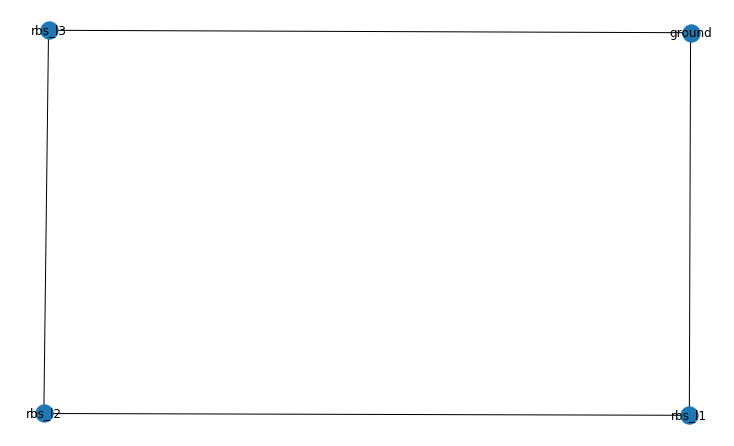

In [5]:
sym_model.topology.draw_constraints_topology()

Checking the system's number of generalized coordinates $n$ and number of constraints $n_c$.

In [6]:
sym_model.topology.n, sym_model.topology.nc 

(28, 27)

### **ASSEMBLING**

This is the last step of the symbolic building process, where we make the system starts the assemblage process of the governing equations, which will be used then in the code generation for the numerical simulation, and also can be used for further symbolic manipulations.</br>

*Note: The equations' notations will be discussed in the tool documentation files.*

In [7]:
# Assembling and Saving model
sym_model.assemble()
sym_model.save(data_dir)

#### Checking the System Equations

In [8]:
sym_model.topology.pos_equations

Matrix([
[ A({P_{ground}})*{\bar{u}^{ground}_{jcs_a}} - A({P_{rbs_l1}})*{\bar{u}^{rbs_l1}_{jcs_a}} + {R_{ground}} - {R_{rbs_l1}}],
[                           Mbar_ground_jcs_a[:,(0, 1)].T*A({P_{ground}}).T*A({P_{rbs_l1}})*Mbar_rbs_l1_jcs_a[:,(2, 3)]],
[                           Mbar_ground_jcs_a[:,(1, 2)].T*A({P_{ground}}).T*A({P_{rbs_l1}})*Mbar_rbs_l1_jcs_a[:,(2, 3)]],
[ A({P_{rbs_l1}})*{\bar{u}^{rbs_l1}_{jcs_b}} - A({P_{rbs_l2}})*{\bar{u}^{rbs_l2}_{jcs_b}} + {R_{rbs_l1}} - {R_{rbs_l2}}],
[ A({P_{rbs_l2}})*{\bar{u}^{rbs_l2}_{jcs_c}} - A({P_{rbs_l3}})*{\bar{u}^{rbs_l3}_{jcs_c}} + {R_{rbs_l2}} - {R_{rbs_l3}}],
[                           Mbar_rbs_l2_jcs_c[:,(0, 1)].T*A({P_{rbs_l2}}).T*A({P_{rbs_l3}})*Mbar_rbs_l3_jcs_c[:,(0, 1)]],
[-A({P_{ground}})*{\bar{u}^{ground}_{jcs_d}} + A({P_{rbs_l3}})*{\bar{u}^{rbs_l3}_{jcs_d}} - {R_{ground}} + {R_{rbs_l3}}],
[                           Mbar_rbs_l3_jcs_d[:,(0, 1)].T*A({P_{rbs_l3}}).T*A({P_{ground}})*Mbar_ground_jcs_d[:,(2, 3)]],
[              

---------------------------------------------------------------
---------------------------------------------------------------

## **SYSTEM CONFIGURATION**
---------------------------

In this step we define a symbolic configuration of our symbolic topology. As you may have noticed in the symbolic topology building step, we only cared about the **_topology_**, thats is the system bodies and their connectivity, and we did not care explicitly with how these components are configured in space.</br>

In order to create a valid numerical simulation session, we have to provide the system with its numerical configuration needed, for example, the joints' locations and orientations. The symbolic topology in its raw form will require you to manually enter all these numerical arguments, which can be cumbersome even for smaller systems. This can be checked by checking the configuration inputs of the symbolic configuration as ```sym_config.config.input_nodes```

Here we start by stating the symbolic inputs we wish to use instead of the default inputs set, and then we define the relation between these newly defined arguments and the original ones. 

**_The details of this process will be provided in the documentation._**

In [9]:
# ============================================================= #
#                     Symbolic Configuration
# ============================================================= #

# Symbolic configuration name.
config_name = '%s_cfg'%project_name

# Symbolic configuration instance.
sym_config = configuration(config_name, sym_model)

### CONFIGURATION INPUTS

In [10]:
# Adding the desired set of UserInputs
# ====================================
sym_config.add_point.UserInput('a')
sym_config.add_point.UserInput('b')
sym_config.add_point.UserInput('c')
sym_config.add_point.UserInput('d')

sym_config.add_vector.UserInput('x')
sym_config.add_vector.UserInput('y')
sym_config.add_vector.UserInput('z')

### CONFIGURATION RELATIONS

In [11]:
# Defining Relations between original topology inputs
# and our desired UserInputs.
# ===================================================

# Revolute Joint (a) location and orientation
sym_config.add_relation.Equal_to('pt1_jcs_a', ('hps_a',))
sym_config.add_relation.Equal_to('ax1_jcs_a', ('vcs_x',))

# Spherical Joint (b) location and orientation
sym_config.add_relation.Equal_to('pt1_jcs_b', ('hps_b',))
sym_config.add_relation.Equal_to('ax1_jcs_b', ('vcs_z',))

# Universal Joint (c) location and orientation
sym_config.add_relation.Equal_to('pt1_jcs_c', ('hps_c',))
sym_config.add_relation.Oriented('ax1_jcs_c', ('hps_b', 'hps_c'))
sym_config.add_relation.Oriented('ax2_jcs_c', ('hps_c', 'hps_b'))

# Revolute Joint (d) location and orientation
sym_config.add_relation.Equal_to('pt1_jcs_d', ('hps_d',))
sym_config.add_relation.Equal_to('ax1_jcs_d', ('vcs_y',))

### GEOMETRIES

Here we start defining basic geometric shapes that can represents the shapes of the bodies in our system. This serves two points:
- Visualization and Animation in blender.
- Evaluating the bodies inertia properties from these basic geometries instead of explicit definition.

In [12]:
# Creating Geometries
# ===================
# links radius
sym_config.add_scalar.UserInput('links_ro')

# Link 1 geometry
sym_config.add_geometry.Cylinder_Geometry('l1', ('hps_a','hps_b','s_links_ro'))
sym_config.assign_geometry_to_body('rbs_l1', 'gms_l1')

# Link 2 geometry
sym_config.add_geometry.Cylinder_Geometry('l2', ('hps_b','hps_c','s_links_ro'))
sym_config.assign_geometry_to_body('rbs_l2', 'gms_l2')

# Link 3 geometry
sym_config.add_geometry.Cylinder_Geometry('l3', ('hps_c','hps_d','s_links_ro'))
sym_config.assign_geometry_to_body('rbs_l3', 'gms_l3')

### ASSEMBLING

In [13]:
# Exporing the configuration as a JSON file
sym_config.export_JSON_file(data_dir)

---------------------------------------------------------------
---------------------------------------------------------------

## Code-Generation
Now we can use our symbolic model to generate the numerical code that can then be used for numerical simulations. For the **uraeus.nmbd.cpp** numerical environment, we import the `standalone_project` class from the `codegen` module and pass in our symbolic model.
This will generate:
- C++ source and header files representing the topology of our model.
- C++ source and header files for a `Simulation` class exposing only the needed functionalities through a minimal API, that can be used in our `main.cpp`.
- Cython wrappers for the C++ `Simulation` class so it can be accessed through python too.
- CMakeLists.txt for automated cross-platform build-systems generation using CMake, building simulation executable and python extension modules.

In [14]:
# ============================================================= #
#                     Code Generation
# ============================================================= #

from uraeus.nmbd.cpp.codegen import standalone_project
project = standalone_project()
project.create_dirs()

project.write_topology_code(sym_model)

Generated CMakeLists.txt at : numenv/cpp/CMakeLists.txt
Generated topology header file at : numenv/cpp/src/spatial_fourbar.hpp
Generated topology source file at : numenv/cpp/src/spatial_fourbar.cpp
Generated simulation header file at : numenv/cpp/src/simulation.hpp
Generated simulation source file at : numenv/cpp/src/simulation.cpp
Generated simulation.pyx at : numenv/cpp/cython/simulation.pyx
Generated simulation.pxd at : numenv/cpp/cython/simulation.pxd
Generated call_obj.pyx file at numenv/cpp/cython
Generated py_obj_wrapper.hpp file at numenv/cpp/cython
Generated CMakeLists.txt file at numenv/cpp/cython


---
---

## **Building Process**

### Generating needed source and header files from the generated cython scripts.

In [15]:
!cd numenv/cpp/cython/ && cythonize simulation.pyx call_obj.pyx

Compiling /home/khaledghobashy/Documents/coding_projects/opensource/uraeus_nmbd_cpp/demos/spatial_fourbar/model/numenv/cpp/cython/simulation.pyx because it changed.
[1/1] Cythonizing /home/khaledghobashy/Documents/coding_projects/opensource/uraeus_nmbd_cpp/demos/spatial_fourbar/model/numenv/cpp/cython/simulation.pyx
Compiling /home/khaledghobashy/Documents/coding_projects/opensource/uraeus_nmbd_cpp/demos/spatial_fourbar/model/numenv/cpp/cython/call_obj.pyx because it changed.
[1/1] Cythonizing /home/khaledghobashy/Documents/coding_projects/opensource/uraeus_nmbd_cpp/demos/spatial_fourbar/model/numenv/cpp/cython/call_obj.pyx


## main.cpp
Here we have to write our simulation routine that will be used to produce the simulation executable.
For this model, we only need to specify the name of the `json` file for the system configuration, and specify the desired time period and desired step-size.
For other models we may have to specify the user-defined functions to control motion-actuators and generic force elements defined in our model.

We use the `%%writefile <filename>` magic command to write the content of the cell to the specified file `<filename>`.

In [16]:
%%writefile numenv/cpp/src/main.cpp

#include "simulation.hpp"

int main()
{
    std::cout << "Calling Solver Default Constructor\n";
    auto sim = Simulation();

    std::cout << "Calling constructFromJSON\n";
    sim.ConstructConfiguration("fourbar.json");

    sim.Solve(2*22./7, 5e-3);

    sim.SaveResults("", "dyn");

    return 0;
};


Writing numenv/cpp/src/main.cpp


### Building Simulation Binaries
The code cell below invokes `cmake ..` to generate the build-system files needed to build the binaries in **Release** mode, then invokes `cmake --build .` to start the building process.

This will produce a `model` executable and a `simulation.so` python extension module that can be imported as a normal python module. These will be placed in the `/bin` directory

In [17]:
!cd numenv/cpp/build && cmake .. -DCMAKE_BUILD_TYPE=Release && cmake --build .

-- The CXX compiler identification is GNU 10.1.0
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
uraeus source directory : /home/khaledghobashy/Documents/coding_projects/opensource/uraeus_nmbd_cpp/uraeus/nmbd/cpp/engine/src
current source directory : /home/khaledghobashy/Documents/coding_projects/opensource/uraeus_nmbd_cpp/demos/spatial_fourbar/model/numenv/cpp
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.7m.so (found suitable version "3.7.5", minimum required is "3") 
Python 3 Directory : /usr/include/python3.7m
-- Configuring done
-- Generating done
-- Build files have been written to: /home/khaledghobashy/Documents/coding_projects/opensource/uraeus_nmbd_cpp/demos/spatial_fourbar/model/numenv/cpp/build
Scanning dependencies of target model_lib
[ 12%] Building CXX ob

---
---

## **Numerical Simulation**
Now we can advance to the **nuemrical simulation** step. In order to perform our desired simulation, we should first define our model numerical configuration data. These data represents how our model is placed in 3D space, where the bodies are located and how they are oriented as well as the other physical components existing in the system.

At the **Symbolic Configuration** step we defined some **user inputs** and some **relations** that states how our system is configured symbolically. These data is stored in a `.json` file at the `/symenv/data/` directory. All we have to do is to make a copy of this file and fill in our numerical configuration data for our defined `user_inputs`.

This file should be passed to our executable to construct the numerical topology correctly.

In [19]:
%%writefile numenv/cpp/bin/fourbar.json

{
    "information": {
        "topology_name": "spatial_fourbar",
        "configuration_name": "spatial_fourbar_cfg",
        "subsystem_name": ""
    },
    "user_inputs": {
        "Rd_rbs_l1": {
            "constructor": "array",
            "args": [
                0.0,
                0.0,
                0.0
            ]
        },
        "Pd_rbs_l1": {
            "constructor": "array",
            "args": [
                0.0,
                0.0,
                0.0,
                0.0
            ]
        },
        "Rdd_rbs_l1": {
            "constructor": "array",
            "args": [
                0.0,
                0.0,
                0.0
            ]
        },
        "Pdd_rbs_l1": {
            "constructor": "array",
            "args": [
                0.0,
                0.0,
                0.0,
                0.0
            ]
        },
        "Rd_rbs_l2": {
            "constructor": "array",
            "args": [
                0.0,
                0.0,
                0.0
            ]
        },
        "Pd_rbs_l2": {
            "constructor": "array",
            "args": [
                0.0,
                0.0,
                0.0,
                0.0
            ]
        },
        "Rdd_rbs_l2": {
            "constructor": "array",
            "args": [
                0.0,
                0.0,
                0.0
            ]
        },
        "Pdd_rbs_l2": {
            "constructor": "array",
            "args": [
                0.0,
                0.0,
                0.0,
                0.0
            ]
        },
        "Rd_rbs_l3": {
            "constructor": "array",
            "args": [
                0.0,
                0.0,
                0.0
            ]
        },
        "Pd_rbs_l3": {
            "constructor": "array",
            "args": [
                0.0,
                0.0,
                0.0,
                0.0
            ]
        },
        "Rdd_rbs_l3": {
            "constructor": "array",
            "args": [
                0.0,
                0.0,
                0.0
            ]
        },
        "Pdd_rbs_l3": {
            "constructor": "array",
            "args": [
                0.0,
                0.0,
                0.0,
                0.0
            ]
        },
        "hps_a": {
            "constructor": "array",
            "args": [
                0.0,
                0.0,
                0.0
            ]
        },
        "hps_b": {
            "constructor": "array",
            "args": [
                0.0,
                0.0,
                200.0
            ]
        },
        "hps_c": {
            "constructor": "array",
            "args": [
                -750.0,
                -850.0,
                650.0
            ]
        },
        "hps_d": {
            "constructor": "array",
            "args": [
                -400.0,
                -850.0,
                0.0
            ]
        },
        "vcs_x": {
            "constructor": "array",
            "args": [
                1.0,
                0.0,
                0.0
            ]
        },
        "vcs_y": {
            "constructor": "array",
            "args": [
                0.0,
                1.0,
                0.0
            ]
        },
        "vcs_z": {
            "constructor": "array",
            "args": [
                0.0,
                0.0,
                1.0
            ]
        },
        "s_links_ro": 20.0
    },
    "evaluations": {
        "gms_l1": {
            "constructor": "Cylinder_Geometry",
            "args": [
                "hps_a",
                "hps_b",
                "s_links_ro"
            ]
        },
        "gms_l2": {
            "constructor": "Cylinder_Geometry",
            "args": [
                "hps_b",
                "hps_c",
                "s_links_ro"
            ]
        },
        "gms_l3": {
            "constructor": "Cylinder_Geometry",
            "args": [
                "hps_c",
                "hps_d",
                "s_links_ro"
            ]
        }
    },
    "outputs": {
        "ax1_jcs_a": "vcs_x",
        "pt1_jcs_a": "hps_a",
        "ax1_jcs_b": "vcs_z",
        "pt1_jcs_b": "hps_b",
        "ax1_jcs_c": {
            "constructor": "Oriented",
            "args": [
                "hps_b",
                "hps_c"
            ]
        },
        "ax2_jcs_c": {
            "constructor": "Oriented",
            "args": [
                "hps_c",
                "hps_b"
            ]
        },
        "pt1_jcs_c": "hps_c",
        "ax1_jcs_d": "vcs_y",
        "pt1_jcs_d": "hps_d",
        "R_rbs_l1": {
            "constructor": "getattribute",
            "args": [
                "gms_l1",
                "R"
            ]
        },
        "P_rbs_l1": {
            "constructor": "getattribute",
            "args": [
                "gms_l1",
                "P"
            ]
        },
        "m_rbs_l1": {
            "constructor": "getattribute",
            "args": [
                "gms_l1",
                "m"
            ]
        },
        "Jbar_rbs_l1": {
            "constructor": "getattribute",
            "args": [
                "gms_l1",
                "J"
            ]
        },
        "R_rbs_l2": {
            "constructor": "getattribute",
            "args": [
                "gms_l2",
                "R"
            ]
        },
        "P_rbs_l2": {
            "constructor": "getattribute",
            "args": [
                "gms_l2",
                "P"
            ]
        },
        "m_rbs_l2": {
            "constructor": "getattribute",
            "args": [
                "gms_l2",
                "m"
            ]
        },
        "Jbar_rbs_l2": {
            "constructor": "getattribute",
            "args": [
                "gms_l2",
                "J"
            ]
        },
        "R_rbs_l3": {
            "constructor": "getattribute",
            "args": [
                "gms_l3",
                "R"
            ]
        },
        "P_rbs_l3": {
            "constructor": "getattribute",
            "args": [
                "gms_l3",
                "P"
            ]
        },
        "m_rbs_l3": {
            "constructor": "getattribute",
            "args": [
                "gms_l3",
                "m"
            ]
        },
        "Jbar_rbs_l3": {
            "constructor": "getattribute",
            "args": [
                "gms_l3",
                "J"
            ]
        }
    },
    "geometries_map": {
        "gms_l1": "rbs_l1",
        "gms_l2": "rbs_l2",
        "gms_l3": "rbs_l3"
    }
}

Writing numenv/cpp/bin/fourbar.json


### Run the Simulation Executable

In [20]:
!cd numenv/cpp/bin/ && ./model

Calling Solver Default Constructor
Initiallizing Simulation
Calling constructFromJSON
Constructing Inputs!
Inputs Constructed!
Constructing Helpers!
Helpers Constructed!
Evaluating Outputs!
Outputs Constructed!

Initializing Model!
Starting Dynamic Solver ...

Running System Dynamic Analysis: 
[=======================================>] 99% | CPU Time(s) = 1.11  
Finished Solver ... 

_pos results saved as : dyn_pos.csv

_vel results saved as : dyn_vel.csv

_acc results saved as : dyn_acc.csv


### Test the generated python extension module

In [18]:
%%writefile numenv/cpp/bin/main.py

import numpy as np
from simulation import PySimulation

model = PySimulation()

model.construct_configuration("fourbar.json")
model.solve(2*np.pi, 5*1e-3)

model.save_results("", "pydyn")

Writing numenv/cpp/bin/main.py


### Run main.py python script

In [21]:
!cd numenv/cpp/bin/ && python main.py

Initiallizing Simulation
Constructing Inputs!
Inputs Constructed!
Constructing Helpers!
Helpers Constructed!
Evaluating Outputs!
Outputs Constructed!

Initializing Model!
Starting Dynamic Solver ...

Running System Dynamic Analysis: 
[=======================================>] 99% | CPU Time(s) = 1.037 
Finished Solver ... 

_pos results saved as : pydyn_pos.csv

_vel results saved as : pydyn_vel.csv

_acc results saved as : pydyn_acc.csv


---
-

## Results' Plots

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
pos_data = pd.read_csv("numenv/cpp/bin/dyn_pos.csv", index_col=0)

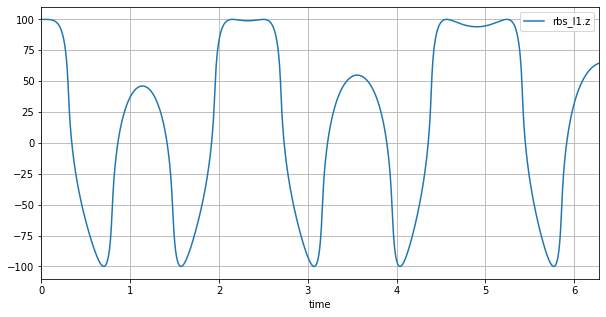

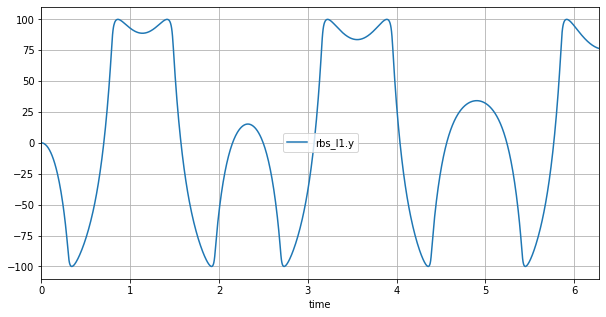

In [24]:
pos_data.plot(x="time", y="rbs_l1.z", grid=True, figsize=(10,5))
pos_data.plot(x="time", y="rbs_l1.y", grid=True, figsize=(10,5))
plt.show()